# Case Study: Medifor
This notebook looks at the differences between a train and test set, specifically the NC17 (train) and MFC18 (test) datasets.

In [3]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts

from scripts.clustering import feature_clustering
from scripts.misclassification import misclassification
from scripts.removal import remove_data
data_dir = '../../data'

## Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

### NC17 (Original features)
We first plot the similarity between data points using the original feature space:

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01417
train auroc: 1.000
test set acc: 0.925828
test log loss: 0.20638
test auroc: 0.974
concatenating X_train and X_test...
embedding with tsne...
saving data to output/feature_clustering/NC17_EvalPart1_None...


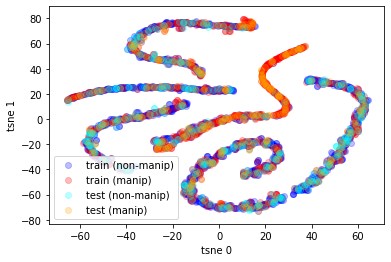

In [4]:
feature_clustering(model='lgb', encoding='None', dataset='NC17_EvalPart1', random_state=1, data_dir=data_dir, save_results=True)

### NC17 (Tree-extracted feature space)
Now we perform the same procedure, except this time with the tree-extracted feature representation:

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01417
train auroc: 1.000
test set acc: 0.925828
test log loss: 0.20638
test auroc: 0.974
concatenating X_train and X_test...
exracting tree features...

Tree Explainer:
train shape: (3019, 36)
classes: [0 1]
linear_model: KernelLogisticRegression(C=0.1, pred_size=1000)
encoding: leaf_output
dense_output: False
fit predicted labels: True
random state: 1

reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
saving data to output/feature_clustering/NC17_EvalPart1_leaf_output...


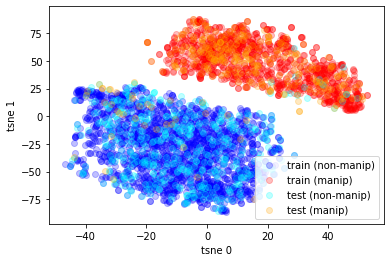

In [5]:
feature_clustering(model='lgb', encoding='leaf_output', dataset='NC17_EvalPart1', true_label=False,
                   linear_model='lr', kernel='linear', random_state=1, data_dir=data_dir, save_results=True)

### NC17 (Train) and MFC18 (Test)
Now we apply the same process to two slightly different datasets: NC17 (train) and MFC18 (test), where we can see there is a clear separation between the positive and negative classes for the training set, but not for the test set:

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711
concatenating X_train and X_test...
exracting tree features...

Tree Explainer:
train shape: (3774, 36)
classes: [0 1]
linear_model: KernelLogisticRegression(C=0.1, pred_size=1000)
encoding: leaf_output
dense_output: False
fit predicted labels: True
random state: 1

reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
saving data to output/feature_clustering/nc17_mfc18_leaf_output...


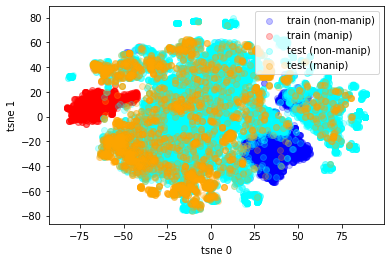

In [6]:
feature_clustering(model='lgb', encoding='leaf_output', dataset='nc17_mfc18', true_label=False,
                   linear_model='lr', kernel='linear', random_state=1, data_dir=data_dir, save_results=True)

## Understanding Misclassified Test Instances
This section chooses a badly misclassified test instance and shows several persepctives:
1. Based on SHAP estimation, we found the feature `lstmwresampling` to have the most impact on the model's prediction of this instance. Thus, we plot the distribution of this feature's values for positive training samples (y=1) and negative training samples (y=0); this plot is shown in the first row of plots on the left. Next, we use TREX's weights for each sample and plot the distribution as weighted density (middle). Finally, we plot a weighted density using the weights x the similarities of the training instances to the test instance.
2. The second row of plots show two distributions: one is the overall weight distribution of the training samples generated by TREX (global explanation). The second is the similarity x weight distribution, where similarity is the similarity of the training samples to the test instance (local explanation).
3. Finally, we show the test instance in a textual format, and the top training samples that contribute to the test instance's prediction. Since viewing a list of feature vectors is difficult, we use SHAP to limit the features to the top ones that contribute the most to each prediction.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


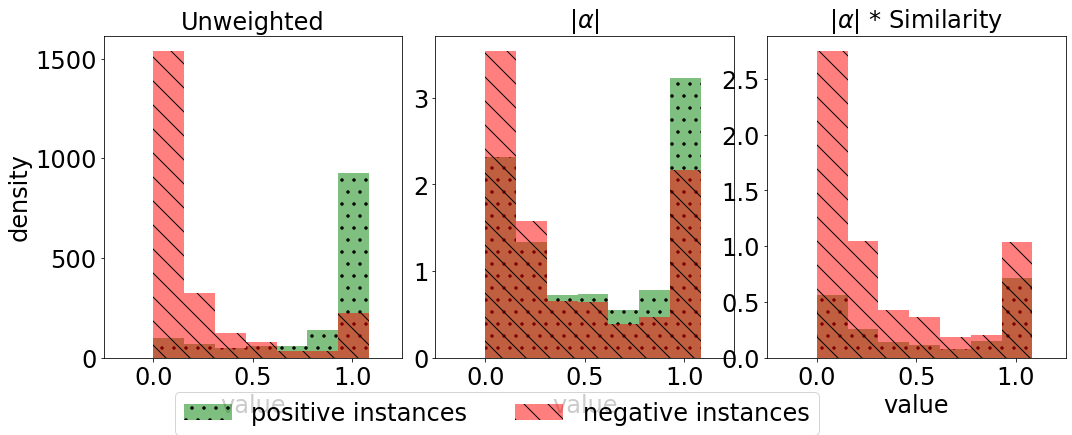

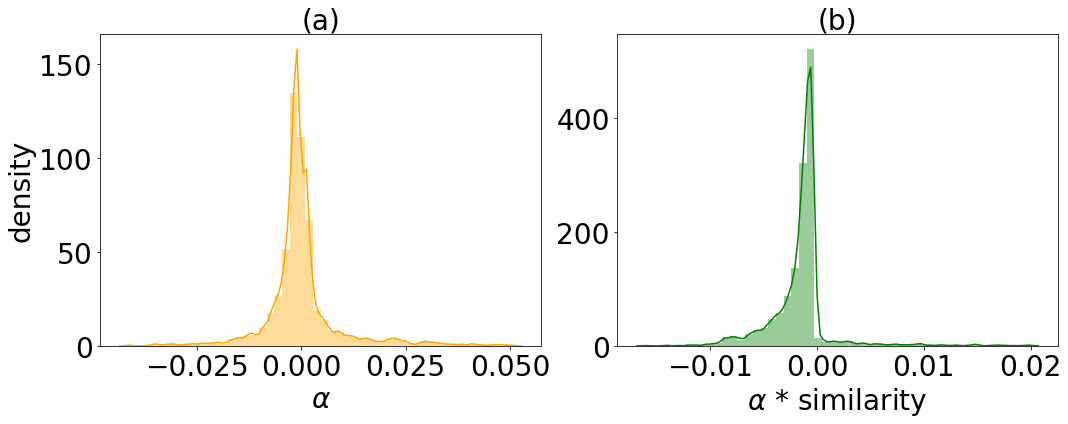


test_8766
predicted as 0, actual is 1
	lstmwresampling: val=0.006, shap=-0.376
	fibberinh: val=-1.000, shap=-0.201
	jpegdimples: val=-1.000, shap=-0.056
	gradbased: val=0.000, shap=0.056
	doublejpeg: val=-1.000, shap=-0.036
train_3756 predicted as 1, actual is 1, contribution=-0.002
	doublejpeg: val=0.985, shap=0.148
	dct03: val=0.000, shap=0.102
	noise01_baseline_ta1: val=4.447, shap=0.081
	block02: val=20.280, shap=0.072
	cfa02_baseline_ta1: val=0.383, shap=0.059
train_3365 predicted as 1, actual is 1, contribution=-0.002
	fibberinh: val=0.000, shap=-0.282
	lstmwresampling: val=0.316, shap=0.134
	doublejpeg: val=0.997, shap=0.108
	p_kitwareualbanycontrastmapping_199e7fff_mediforsystem: val=0.409, shap=0.074
	dct03: val=0.211, shap=0.062
train_1996 predicted as 1, actual is 1, contribution=-0.002
	fibberinh: val=0.000, shap=-0.257
	tallc: val=0.787, shap=0.138
	contrast_enhance: val=0.864, shap=0.092
	lstmwresampling: val=0.047, shap=-0.067
	dct03: val=0.061, shap=0.055
train_3173 pr

In [2]:
misclassification(model='lgb', encoding='leaf_output', dataset='nc17_mfc18', random_state=1,
                  linear_model='lr', kernel='linear', data_dir=data_dir)

## Removing Harmful Training
This section randomly samples 25% of the misclassified test instances, computes the sum contributions of each training sample to those instances, and removes the ones with the highest negative contributions in batches. The model is then retrained after each removal and it's performance on the test set is computed. This is repeated a number of times, where different test instances are sampled in each round and the results are averaged.

run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20


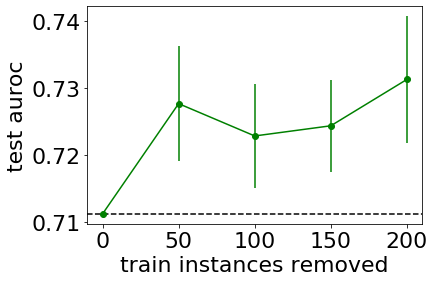

In [3]:
remove_data(model='lgb', encoding='leaf_output', dataset='nc17_mfc18', repeats=20,
            linear_model='lr', kernel='linear', iterations=5, n_remove=50, sample_frac=0.25,
            data_dir=data_dir)